In [1]:
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt
import time
from statistics import mean
import timeit

In [2]:
from gym.wrappers import Monitor

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
import math
import copy
from torch.distributions import Categorical
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
#Hyper-parameters
max_episodes = 1000          # max training episodes
max_timesteps = 250          # max timesteps in one episode
gamma = 0.01                 # discount factor
gamma1 = 0.99
epsilon = 0.2                #need to change it to max(advantage)
dkl=1                       #need to change it to KL divergence between old and new policies
Q_r=[]
Q_r1=[]
a=[]
Q=np.zeros((max_timesteps,2))
mutation_power = 0.02#hyper-parameter, set from https://arxiv.org/pdf/1712.06567.pdf
#print(Q)

In [6]:
class CartPoleAI(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc = nn.Sequential(
                        nn.Linear(4,128, bias=True),
                        nn.ReLU(),
                        nn.Linear(128,2, bias=True),
                        nn.Softmax(dim=1)
                        )

                
        def forward(self, inputs):
            x = self.fc(inputs)
            return x

In [7]:
def init_weights(m):
    
        # nn.Conv2d weights are of shape [16, 1, 3, 3] i.e. # number of filters, 1, stride, stride
        # nn.Conv2d bias is of shape [16] i.e. # number of filters
        
        # nn.Linear weights are of shape [32, 24336] i.e. # number of input features, number of output features
        # nn.Linear bias is of shape [32] i.e. # number of output features
        
        if ((type(m) == nn.Linear) | (type(m) == nn.Conv2d)):
            torch.nn.init.xavier_uniform(m.weight)
            m.bias.data.fill_(0.00)

In [8]:
def behavioural_policy(agents):
    return agent

In [9]:
def KL_divergence(agent1,agent2):
    return KL

In [10]:
def return_random_agents(num_agents):
    
    agents = []
    for _ in range(num_agents):
        
        agent = CartPoleAI()
        
        for param in agent.parameters():
            param.requires_grad = False
            
        init_weights(agent)
        agents.append(agent)
        
        
    return agents

In [11]:
def run_agents(agents):
    
    reward_agents = []
    env = gym.make("CartPole-v0")
    #print("Enter")
    for agent in agents:#There is only one agent in the list. But it is necessary to pass the agents in the form of lists to make it iterable and work on it
        agent.eval()
        #print("HELLLO!!!!!!")
        observation = env.reset()
        r=0
        a.clear()
        Q_r1.clear()
        Q_r.clear()
        for i in range(max_timesteps):
            
            inp = torch.tensor(observation).type('torch.FloatTensor').view(1,-1)
            output_probabilities = agent(inp).detach().numpy()[0]
            #print(output_probabilities)
            Q[i][0]=output_probabilities[0]
            Q[i][1]=output_probabilities[1]
            action = np.random.choice(range(game_actions), 1, p=output_probabilities).item()
            a.append(action)
            new_observation, reward, done, info = env.step(action)
            r+=reward
            #r+=(gamma1**i)*reward
            Q_r.append(reward)
            observation = new_observation
            if(done):
                break

        #reward_agents.append(r)
        #reward_agents.append(s)
        #print("Non-discounted Reward:::",Q_r)
        #for rew in reversed(Q_r):
        #    if rew==Q_r[len(Q_r)-1]:
        #        d_r=0
        #    else:
        #        d_r=rew+gamma1*d_r
        #    Q_r1.insert(0,d_r)
        for i in range(len(Q_r)):
            d_r=0
            c=0
            for j in range(i+1,len(Q_r)):
                d_r+=(gamma1**c)*Q_r[j]
                c+=1
            Q_r1.append(d_r)
            
        reward_agents.append(Q_r1[0])
    #print("Exit")
    #Q=Q[~np.all(Q==0,axis=1)]
    #print("Reward:::",reward_agents)
    #print("Probabilities:::",Q)
    #print("Actions:::",a)
    #for i in range()
    #print("Discounted Reward,i.e,Q:::",Q_r1)
    
    
    return reward_agents

In [12]:
def run_target_agents(agents):
    
    reward_agents = []
    env = gym.make("CartPole-v0")
    #print("Enter")
    for agent in agents:#There is only one agent in the list. But it is necessary to pass the agents in the form of lists to make it iterable and work on it
        agent.eval()
        #print("HELLLO!!!!!!")
        observation = env.reset()
        r=0
        s=0
        i=0
        #print("SIZE OF ACTIONS:",len(a),"SIZE OF PROBABILITIES:",Q.shape,"SIZE OF DISCOUNTED REWARDS:",len(Q_r1))
        for i in range(len(Q_r1)):
            
            inp = torch.tensor(observation).type('torch.FloatTensor').view(1,-1)
            output_probabilities = agent(inp).detach().numpy()[0]
            L_pi=(output_probabilities[a[i]]/Q[i][a[i]])*Q_r1[i]
            #print("Ratios :",output_probabilities[a[i]]/Q[i][a[i]])
            #print("Q value:",Q_r1[i])
            #print("L_pi",L_pi)
            #surr1= L_pi-(4*max(Q_r1)*gamma*dkl/np.square(1-gamma))
            
            #print(output_probabilities)
            s+=L_pi
            action = np.random.choice(range(game_actions), 1, p=output_probabilities).item()
            new_observation, reward, done, info = env.step(action)
            #r+=(gamma**i)*reward
            
            #s=s+1
            observation = new_observation

            if(done):
                break
        #print("S:",s)
        #print("Max Q_r1:",max(Q_r1))
        #surr1= s-(4*max(Q_r1)*gamma*dkl/np.square(1-gamma))
        #print("Surr1:",surr1)
        #reward_agents.append(surr1)        
        reward_agents.append(s)
    #print("Exit")
    #print("REWARD AGENTS",reward_agents)
    #print(reward_agents)
    return reward_agents

In [13]:
def alternate_average_score(agent, runs):
    score = 0.
    for i in range(runs):
        score += run_target_agents([agent])[0]
    return score/runs

In [14]:
def return_average_score(agent, runs):
    score = 0.
    for i in range(runs):
        score += run_agents([agent])[0]
    return score/runs

In [15]:
def run_agents_n_times(agents, runs):
    avg_score = []
    index = 0
    for agent in agents:
        if index%2==0:
            avg_score.append(return_average_score(agent,runs))
        else:
            avg_score.append(alternate_average_score(agent,runs))
        index+=1
    return avg_score

In [16]:
def mutate(agent):

    child_agent = copy.deepcopy(agent)
            
    for param in child_agent.parameters():
    
        if(len(param.shape)==4): #weights of Conv2D

            for i0 in range(param.shape[0]):
                for i1 in range(param.shape[1]):
                    for i2 in range(param.shape[2]):
                        for i3 in range(param.shape[3]):
                            
                            param[i0][i1][i2][i3]+= mutation_power * np.random.rand()
                                
                                    

        elif(len(param.shape)==2): #weights of linear layer
            for i0 in range(param.shape[0]):
                for i1 in range(param.shape[1]):
                    
                    param[i0][i1]+= mutation_power * np.random.randn()
                        

        elif(len(param.shape)==1): #biases of linear layer or conv layer
            for i0 in range(param.shape[0]):
                
                param[i0]+=mutation_power * np.random.randn()

    return child_agent

In [17]:
def return_children(agents, sorted_parent_indexes, elite_index):
    
    children_agents = []
    
    #first take selected parents from sorted_parent_indexes and generate N-1 children
    for i in range(len(agents)-1):
        
        selected_agent_index = sorted_parent_indexes[np.random.randint(len(sorted_parent_indexes))]
        children_agents.append(mutate(agents[selected_agent_index]))

    #now add one elite
    elite_child = add_elite(agents, sorted_parent_indexes, elite_index)
    children_agents.append(elite_child)
    elite_index=len(children_agents)-1 #it is the last one
    
    return children_agents, elite_index

In [18]:
def add_elite(agents, sorted_parent_indexes, elite_index=None, only_consider_top_n=10):
    
    candidate_elite_index = sorted_parent_indexes[:only_consider_top_n]
    
    if(elite_index is not None):
        candidate_elite_index = np.append(candidate_elite_index,[elite_index])
        
    top_score = None
    top_elite_index = None
    
    for i in candidate_elite_index:
        score = return_average_score(agents[i],runs=5)
        print("Score for elite i ", i, " is ", score)
        
        if(top_score is None):
            top_score = score
            top_elite_index = i
        elif(score > top_score):
            top_score = score
            top_elite_index = i
            
    print("Elite selected with index ",top_elite_index, " and score", top_score)
    
    child_agent = copy.deepcopy(agents[top_elite_index])
    return child_agent

In [19]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [20]:
def run_agents_n_times_again(agents, runs):
    avg_score = []
    for agent in agents:
        avg_score.append(return_average_score(agent,runs))
    return avg_score



Generation  0  | Mean rewards:  116.60205292959233  | Mean of top 5:  587.9456092197827
The minimum reward is earned is  15.625014127420446 by the  59 th agent
Top  10  scores [63 89 13 67 25 43 91 49 31 27]
Rewards for top:  [953.7776684013016, 555.6895165764793, 506.0985076910511, 504.283189150137, 419.8791642799447, 409.37907769020933, 408.359604931227, 398.354516322008, 341.6514575000618, 341.18465134741285]
Score for elite i  63  is  16.406930295750293
Score for elite i  89  is  23.717579592413124
Score for elite i  13  is  16.16409954101952
Score for elite i  67  is  15.999501113624166
Score for elite i  25  is  16.799787544417512
Score for elite i  43  is  14.361996088545439
Score for elite i  91  is  16.073585337879113
Score for elite i  49  is  19.39866866365201
Score for elite i  31  is  20.4755736795304
Score for elite i  27  is  17.37978761793115
Elite selected with index  89  and score 23.717579592413124


Generation  1  | Mean rewards:  117.35115354425555  | Mean of top

Score for elite i  59  is  21.3747773756019
Score for elite i  63  is  14.331488523726605
Score for elite i  27  is  14.809491167998678
Score for elite i  61  is  19.018283928696647
Score for elite i  7  is  20.572903094115595
Score for elite i  83  is  14.467293780768575
Score for elite i  45  is  24.78952914985611
Score for elite i  35  is  20.17674629947094
Score for elite i  41  is  20.91930843439996
Score for elite i  71  is  16.154443344389225
Score for elite i  99  is  23.19675548127728
Elite selected with index  45  and score 24.78952914985611


Generation  9  | Mean rewards:  127.67696106631045  | Mean of top 5:  812.9276505964656
The minimum reward is earned is  16.688615788041236 by the  37 th agent
Top  10  scores [19 25 69 65 57 87 79 89 23 73]
Rewards for top:  [1127.135203635021, 962.5726438359998, 881.628388776972, 603.4966109534106, 489.8054057809249, 363.966915652106, 346.02049320405814, 335.8057589895819, 326.2565604875849, 324.80308776691027]
Score for elite i  19  

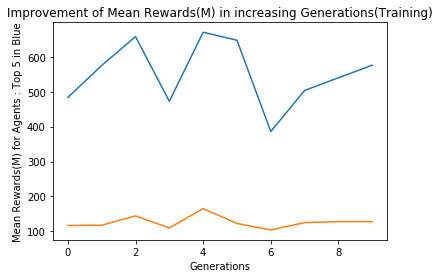

Eta_pi : [20.213340173412632, 18.325411393744382, 19.54975352151572, 21.239367824613197, 20.954195125141425, 19.007416787684814, 18.7187035329584, 17.939718049225913, 20.168151534805062, 19.207638534899473, 18.123326689666552, 20.13079660466336, 21.24069323936844, 19.559078980556333, 20.26210022312894, 21.11479958714621, 16.140112586736414, 20.429986973267184, 19.543303898072146, 21.913022511053278, 19.23674818842661, 19.99073585900178, 20.177990894228103, 18.078062592016646, 19.180591935191128, 19.596699660409403, 17.068807532201053, 20.140804858341976, 19.518534344457848, 18.00671432570622, 18.92547191512273, 20.05897780309726, 21.249226980599573, 19.432710399700785, 19.516076335378163, 18.036585469575506, 18.18022683298758, 16.209001997720453, 19.97239682606013, 17.29243680776021, 18.332505696687896, 17.385859280519995, 19.07825717729133, 17.751646024350112, 17.363837861306113, 19.107186540621324, 18.237239567275005, 19.300294453417965, 21.833281486778727, 19.01194932746887, 18.9532

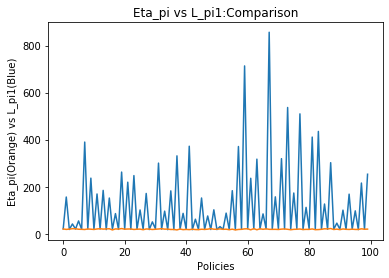

In [21]:
game_actions = 2 #2 actions possible: left or right
start = timeit.default_timer()
#disable gradients as we will not use them
torch.set_grad_enabled(False)

# initialize N number of agents
num_agents = 100
agents = return_random_agents(num_agents)

# How many top agents to consider as parents
top_limit = 10

# run evolution until X generations
generations = 10

elite_index = None
n=[]
m=[]

for generation in range(generations):

    # return rewards of agents
    rewards = run_agents_n_times(agents, 100) #return average of multiple runs
    #print(rewards)
    #sort by rewards
    sorted_parent_indexes = np.argsort(rewards)[::-1][:top_limit] #reverses and gives top values (argsort sorts by ascending by default) https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order
    print("")
    print("")
    top_rewards = []
    
    for best_parent in sorted_parent_indexes:
        top_rewards.append(rewards[best_parent])
    
    print("Generation ", generation, " | Mean rewards: ", np.mean(rewards), " | Mean of top 5: ",np.mean(top_rewards[:5]))
    #print(rewards)
    print("The minimum reward is earned is ",min(rewards),"by the ",rewards.index(min(rewards))+1,"th agent")
    print("Top ",top_limit," scores", sorted_parent_indexes)
    print("Rewards for top: ",top_rewards)
    
    m.append(np.mean(top_rewards))
    n.append(np.mean(rewards))
    # setup an empty list for containing children agents
    children_agents, elite_index = return_children(agents, sorted_parent_indexes, elite_index)

    # kill all agents, and replace them with their children
    agents = children_agents
stop = timeit.default_timer()
print('Time: ', stop - start)  
x=np.arange(generations)
plt.plot(x,m)
plt.plot(x,n)
plt.title('Improvement of Mean Rewards(M) in increasing Generations(Training)')
plt.ylabel('Mean Rewards(M) for Agents : Top 5 in Blue')
plt.xlabel('Generations')
plt.show()

#plotting for final generation eta_pi vs l_pi1(pi)
rewards1 = run_agents_n_times(agents, 100) #return average of multiple runs
rewards2 = run_agents_n_times_again(agents,100)

print("Eta_pi :",rewards2)
print(" ")
print("Corresponding L_pi1 values :",rewards1)
print(" ")
sorted_parent_indexes1 = np.argsort(rewards1)[::-1][:top_limit]
sorted_parent_indexes2 = np.argsort(rewards2)[::-1][:top_limit]
print("Top ",top_limit," policies according to L_pi1 estimate are :",sorted_parent_indexes1)
print("Top ",top_limit," policies according to Eta_pi estimate are :",sorted_parent_indexes2)
print(" ")
xpoints = np.arange(100)
plt.plot(xpoints,rewards1)
plt.plot(xpoints,rewards2)
plt.title('Eta_pi vs L_pi1:Comparison')
plt.xlabel('Policies')
plt.ylabel('Eta_pi(Orange) vs L_pi1(Blue)')
plt.show()

In [22]:
def play_agent(agent):
        env = gym.make("CartPole-v0")
        
        env_record = Monitor(env, './video', force=True)
        observation = env_record.reset()
        last_observation = observation
        r=0
        j=[]
        episode_durations=[]
        timestep=0
        for timestep in range(1000):
            env_record.render()
            inp = torch.tensor(observation).type('torch.FloatTensor').view(1,-1)
            output_probabilities = agent(inp).detach().numpy()[0]
            action = np.random.choice(range(game_actions), 1, p=output_probabilities).item()
            new_observation, reward, done, info = env_record.step(action)
            r=r+reward
            j.append(r)
            observation = new_observation

            if(done):
                break

        env_record.close()

        print("Total Collected Rewards: ",r)

In [23]:
for i in range(num_agents):
    play_agent(agents[i])

Total Collected Rewards:  11.0
Total Collected Rewards:  19.0
Total Collected Rewards:  20.0
Total Collected Rewards:  18.0
Total Collected Rewards:  40.0
Total Collected Rewards:  31.0
Total Collected Rewards:  15.0
Total Collected Rewards:  16.0
Total Collected Rewards:  11.0
Total Collected Rewards:  21.0
Total Collected Rewards:  14.0
Total Collected Rewards:  14.0
Total Collected Rewards:  25.0
Total Collected Rewards:  20.0
Total Collected Rewards:  17.0
Total Collected Rewards:  36.0
Total Collected Rewards:  26.0
Total Collected Rewards:  16.0
Total Collected Rewards:  24.0
Total Collected Rewards:  38.0
Total Collected Rewards:  14.0
Total Collected Rewards:  36.0
Total Collected Rewards:  58.0
Total Collected Rewards:  13.0
Total Collected Rewards:  51.0
Total Collected Rewards:  15.0
Total Collected Rewards:  14.0
Total Collected Rewards:  16.0
Total Collected Rewards:  13.0
Total Collected Rewards:  22.0
Total Collected Rewards:  15.0
Total Collected Rewards:  22.0
Total Co